![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install livelossplot

     |████████████████████████████████| 793 kB 7.0 MB/s 
     |████████████████████████████████| 381 kB 42.6 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


In [3]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts


from sklearn.preprocessing import MinMaxScaler

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


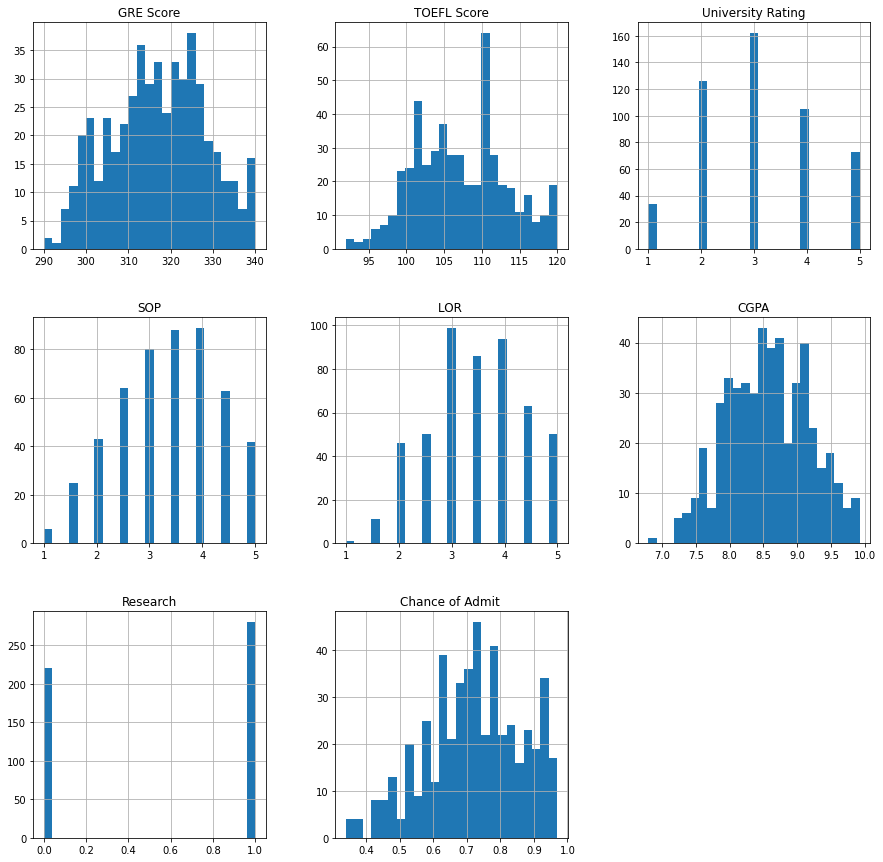

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(np.array(data[data.columns[-1]]),columns=['labels'])

In [7]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [9]:
# Normalización de variables predictoras (X) con la función StandardScaler
scaler = MinMaxScaler()
scaler.fit(X)


# Transformación de los set de entrenamiento y test
XTrain = pd.DataFrame(data=scaler.transform(XTrain), columns=XTrain.columns, index=XTrain.index)
XTest = pd.DataFrame(data=scaler.transform(XTest), columns=XTest.columns, index=XTest.index)

XTrain = np.array(XTrain)
yTrain = np.array(yTrain)

XTest = np.array(XTest)
yTest = np.array(yTest)

In [10]:
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [11]:
dims = XTrain.shape[1]
print(dims, 'input variables')

7 input variables


Se visualizan los datos de XTrain y XTest ya estandarizados:

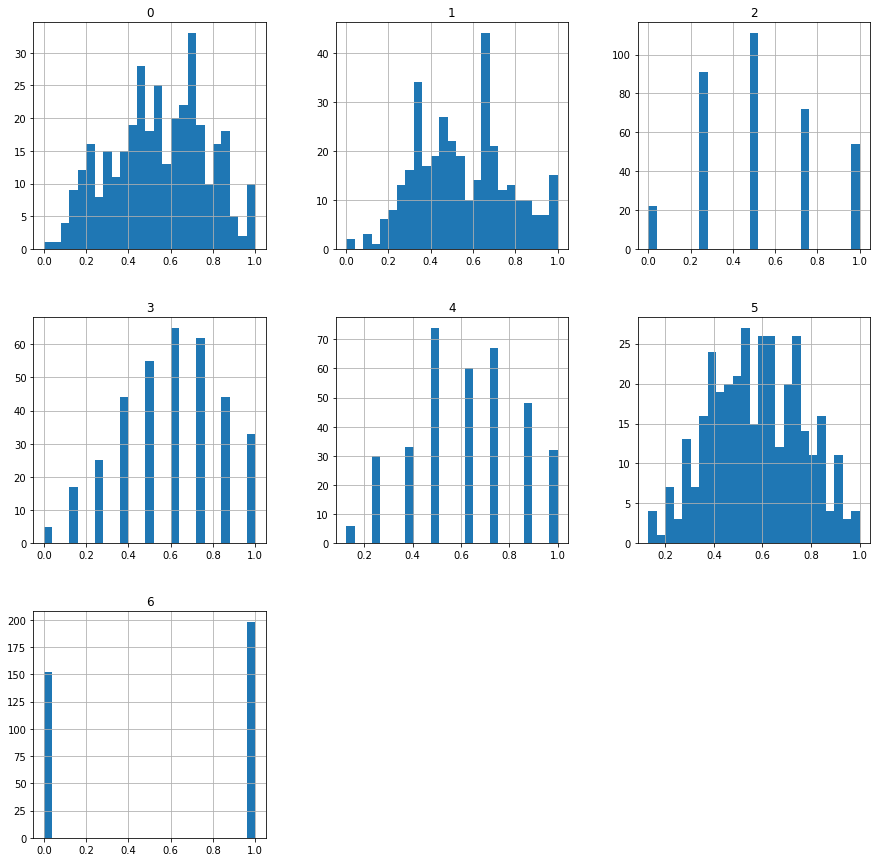

In [12]:
pd.DataFrame(XTrain).hist(bins=25, figsize=(15,15))
plt.show()

In [13]:
pd.DataFrame(XTrain).describe()

,0,1,2,3,4,5,6
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.536114,0.550510,0.532143,0.602857,0.626786,0.575980,0.565714
std,0.225566,0.216668,0.287395,0.248294,0.223820,0.189628,0.496372
min,0.000000,0.000000,0.000000,0.000000,0.125000,0.131410,0.000000
25%,0.380000,0.392857,0.250000,0.375000,0.500000,0.430288,0.000000
50%,0.540000,0.535714,0.500000,0.625000,0.625000,0.567308,1.000000
75%,0.700000,0.714286,0.750000,0.750000,0.750000,0.724359,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Listamos el conjunto de optimizadores para probar los modelos y encontrar el optimizador que mejor desempeño proporcione al modelo
import tensorflow as tf
optimizadores = [
    tf.keras.optimizers.Adadelta(),
    tf.keras.optimizers.Adagrad(),
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adamax(),
    tf.keras.optimizers.Ftrl(),
    tf.keras.optimizers.Nadam(),
    tf.keras.optimizers.RMSprop(), 
    tf.keras.optimizers.SGD()
]
epocas = list(range(0,105,5))

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
# Celda 1
# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
resultados = {}
total = {}

for optimizador in optimizadores:
    model = keras.Sequential([
    keras.layers.Dense(output_var, input_shape=(dims,))])
    model.compile(loss='mean_squared_error',optimizer=optimizador,metrics=["mae"])
    nombre_optimizador = str(type(optimizador).__name__)
    total[nombre_optimizador] = model.fit(XTrain, yTrain, epochs=1000,validation_data=(XTest, yTest), verbose = False)

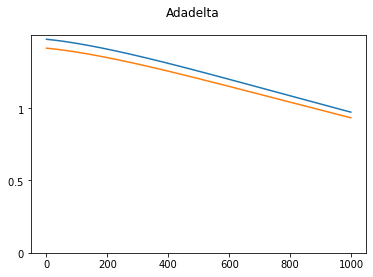

El Desempeño del modelo es de: 0.9724764823913574
El Desempeño del modelo en Test es de: 0.9337073564529419
El MAE del modelo es de: 0.9112286567687988


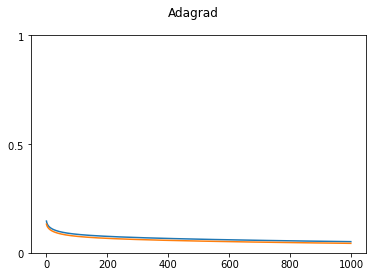

El Desempeño del modelo es de: 0.05128244310617447
El Desempeño del modelo en Test es de: 0.04351053386926651
El MAE del modelo es de: 0.18092134594917297


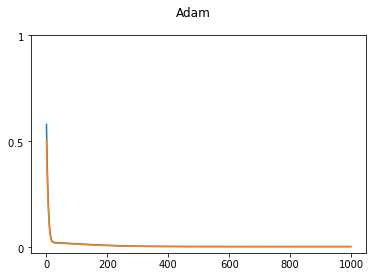

El Desempeño del modelo es de: 0.0037482925690710545
El Desempeño del modelo en Test es de: 0.0031148542184382677
El MAE del modelo es de: 0.042530227452516556


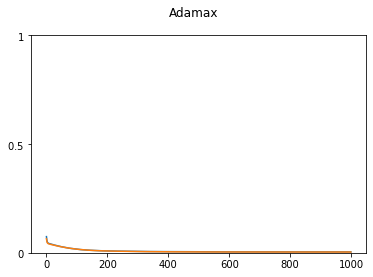

El Desempeño del modelo es de: 0.003752618096768856
El Desempeño del modelo en Test es de: 0.0031180563382804394
El MAE del modelo es de: 0.042926084250211716


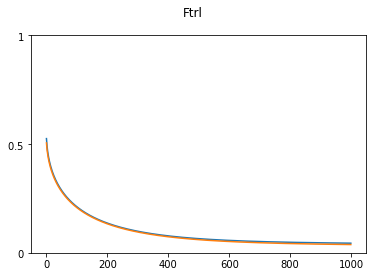

El Desempeño del modelo es de: 0.044171061366796494
El Desempeño del modelo en Test es de: 0.03787589818239212
El MAE del modelo es de: 0.1646609753370285


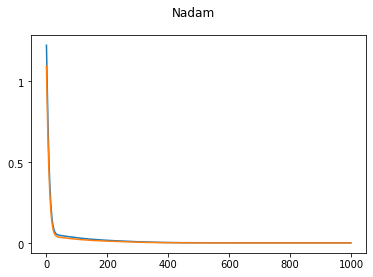

El Desempeño del modelo es de: 0.0037526218220591545
El Desempeño del modelo en Test es de: 0.003113787854090333
El MAE del modelo es de: 0.04254293814301491


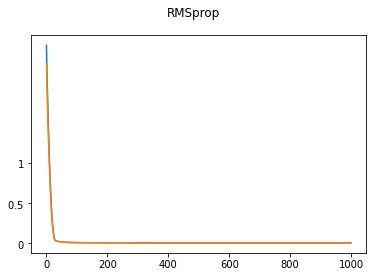

El Desempeño del modelo es de: 0.003747421083971858
El Desempeño del modelo en Test es de: 0.0031148139387369156
El MAE del modelo es de: 0.04274650663137436


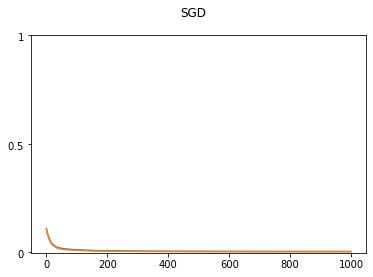

El Desempeño del modelo es de: 0.0038471738807857037
El Desempeño del modelo en Test es de: 0.003218129277229309
El MAE del modelo es de: 0.04413624480366707
El optimizador que presenta un mejor desempeño es Adam con un MAE del: 0.042530227452516556


In [18]:
mejor_mae = 100000000
for optimizador in optimizadores:
  nombre_optimizador = str(type(optimizador).__name__)
  loss = total[nombre_optimizador].history['loss']
  val_loss = total[nombre_optimizador].history['val_loss']
  mae = total[nombre_optimizador].history['mae']
  df = pd.DataFrame(zip(loss,val_loss),columns=['Desempeño','Desempeño Test'])
  plt.plot(df)
  plt.suptitle(nombre_optimizador)
  plt.yticks([0, +0.5, +1],[r'$0$', r'$0.5$', r'$1$'])
  plt.show()
  print('El Desempeño del modelo es de: '+str(min(loss)))
  print('El Desempeño del modelo en Test es de: '+str(min(val_loss)))
  print('El MAE del modelo es de: '+str(min(mae)))
  if min(mae) < mejor_mae:
    mejor_mae = min(mae)
    mejor = nombre_optimizador

mae_1 = mejor_mae
optimizador_1 = mejor
print('El optimizador que presenta un mejor desempeño es '+str(mejor)+' con un MAE del: '+str(mejor_mae))

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [19]:
for optimizador in optimizadores:
    model = Sequential()
    model.add(Dense(256, input_shape=(dims,),activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(output_var))
    model.add(Activation('relu'))
    model.compile(loss='mean_squared_error',optimizer=optimizador,metrics=["mae"])
    nombre_optimizador = str(type(optimizador).__name__)
    total[nombre_optimizador] = model.fit(XTrain, yTrain, epochs=1000,validation_data=(XTest, yTest), verbose = False)

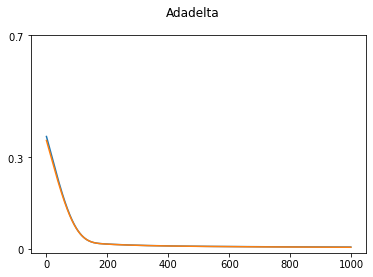

El Desempeño del modelo es de: 0.005699040833860636
El Desempeño del modelo en Test es de: 0.005117377266287804
El MAE del modelo es de: 0.05724453553557396


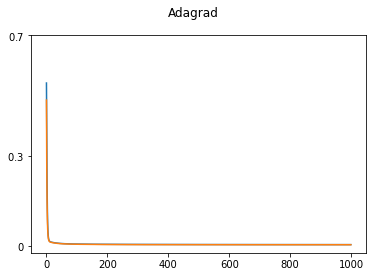

El Desempeño del modelo es de: 0.003566607367247343
El Desempeño del modelo en Test es de: 0.003270684042945504
El MAE del modelo es de: 0.04215192794799805


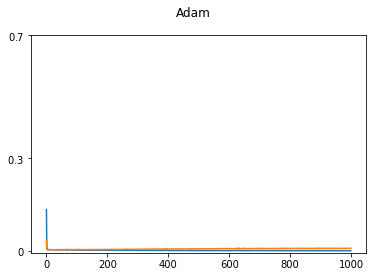

El Desempeño del modelo es de: 0.00019964510283898562
El Desempeño del modelo en Test es de: 0.0033269249834120274
El MAE del modelo es de: 0.010048827156424522


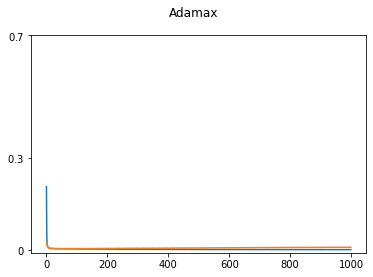

El Desempeño del modelo es de: 0.0001735594851197675
El Desempeño del modelo en Test es de: 0.003388629760593176
El MAE del modelo es de: 0.008898992091417313


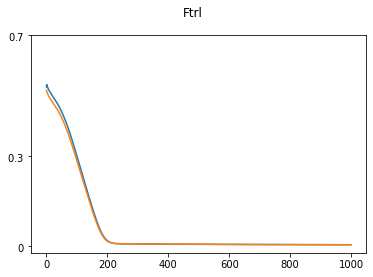

El Desempeño del modelo es de: 0.005720382556319237
El Desempeño del modelo en Test es de: 0.005513390526175499
El MAE del modelo es de: 0.05671153590083122


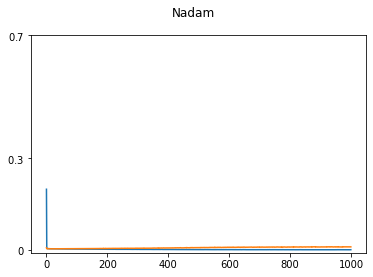

El Desempeño del modelo es de: 0.0002253540005767718
El Desempeño del modelo en Test es de: 0.0033261922653764486
El MAE del modelo es de: 0.00989694893360138


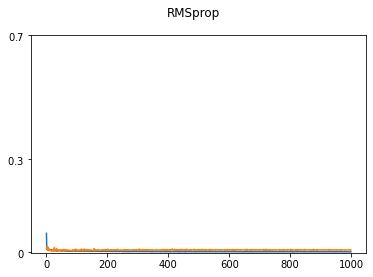

El Desempeño del modelo es de: 0.0001707433839328587
El Desempeño del modelo en Test es de: 0.0034446946810930967
El MAE del modelo es de: 0.009286015294492245


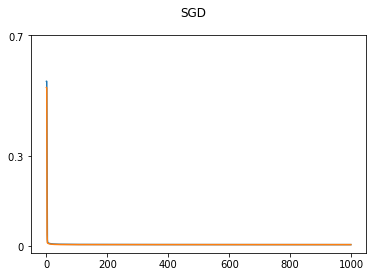

El Desempeño del modelo es de: 0.0032967757433652878
El Desempeño del modelo en Test es de: 0.003347347490489483
El MAE del modelo es de: 0.03997066617012024
El optimizador que presenta un mejor desempeño es Adamax con un MAE del: 0.008898992091417313


In [20]:
mejor_mae = 100000000
for optimizador in optimizadores:
  nombre_optimizador = str(type(optimizador).__name__)
  loss = total[nombre_optimizador].history['loss']
  val_loss = total[nombre_optimizador].history['val_loss']
  mae = total[nombre_optimizador].history['mae']
  df = pd.DataFrame(zip(loss,val_loss),columns=['Desempeño','Desempeño Test'])
  plt.plot(df)
  plt.suptitle(nombre_optimizador)
  plt.yticks([0, +0.3, +0.7],[r'$0$', r'$0.3$', r'$0.7$'])
  plt.show()
  print('El Desempeño del modelo es de: '+str(min(loss)))
  print('El Desempeño del modelo en Test es de: '+str(min(val_loss)))
  print('El MAE del modelo es de: '+str(min(mae)))
  if min(mae) < mejor_mae:
    mejor_mae = min(mae)
    mejor = nombre_optimizador

mae_2 = mejor_mae
optimizador_2 = mejor
print('El optimizador que presenta un mejor desempeño es '+str(mejor)+' con un MAE del: '+str(mejor_mae))

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [21]:
# Celda 3
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

for optimizador in optimizadores:
    model = Sequential()
    model.add(Dense(256, input_shape=(dims,)))
    model.add(Dropout(0.3))
    model.add(Dense(256, input_shape=(dims,),activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(output_var,activation='relu'))
    model.compile(loss='mean_squared_error',optimizer=optimizador,metrics=["mae"])
    nombre_optimizador = str(type(optimizador).__name__)
    total[nombre_optimizador] = model.fit(XTrain, yTrain, epochs=1000,validation_data=(XTest, yTest),callbacks=[best_model,early_stop], verbose = False)

Epoch 3: early stopping
Epoch 57: early stopping
Epoch 3: early stopping
Epoch 6: early stopping
Epoch 336: early stopping
Epoch 3: early stopping
Epoch 3: early stopping
Epoch 8: early stopping


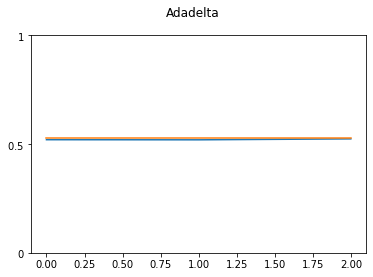

El Desempeño del modelo es de: 0.5195945501327515
El Desempeño del modelo en Test es de: 0.5262680053710938
El MAE del modelo es de: 0.7065085768699646
El early stopping se produce en la época 3


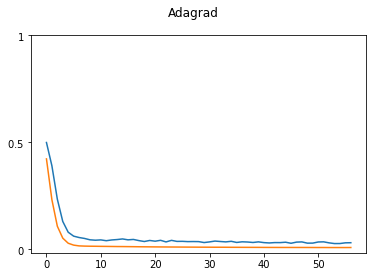

El Desempeño del modelo es de: 0.024933233857154846
El Desempeño del modelo en Test es de: 0.0062965345568954945
El MAE del modelo es de: 0.1277003437280655
El early stopping se produce en la época 57


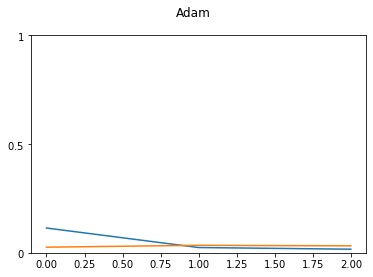

El Desempeño del modelo es de: 0.016514141112565994
El Desempeño del modelo en Test es de: 0.025783611461520195
El MAE del modelo es de: 0.10290749371051788
El early stopping se produce en la época 3


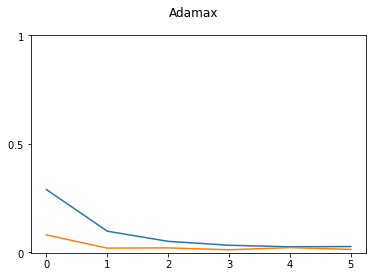

El Desempeño del modelo es de: 0.024690475314855576
El Desempeño del modelo en Test es de: 0.010952439159154892
El MAE del modelo es de: 0.12372909486293793
El early stopping se produce en la época 6


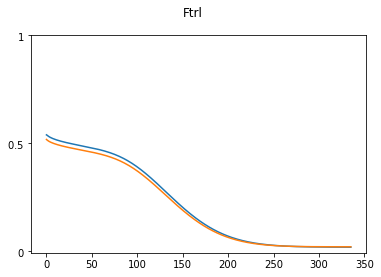

El Desempeño del modelo es de: 0.01946944184601307
El Desempeño del modelo en Test es de: 0.021220894530415535
El MAE del modelo es de: 0.11423278599977493
El early stopping se produce en la época 336


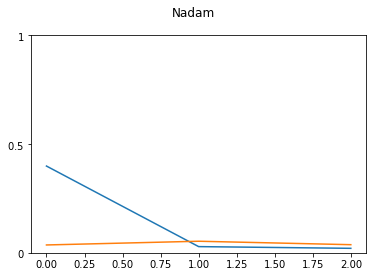

El Desempeño del modelo es de: 0.02058052271604538
El Desempeño del modelo en Test es de: 0.036067649722099304
El MAE del modelo es de: 0.11599815636873245
El early stopping se produce en la época 3


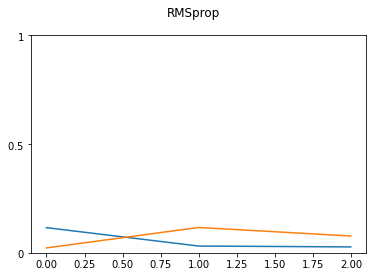

El Desempeño del modelo es de: 0.027111707255244255
El Desempeño del modelo en Test es de: 0.022581355646252632
El MAE del modelo es de: 0.13407206535339355
El early stopping se produce en la época 3


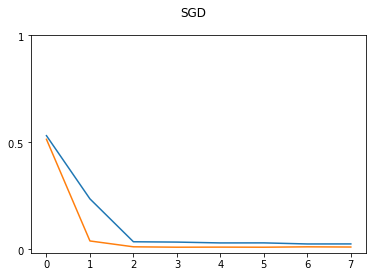

El Desempeño del modelo es de: 0.023877492174506187
El Desempeño del modelo en Test es de: 0.008626177906990051
El MAE del modelo es de: 0.12338776886463165
El early stopping se produce en la época 8
El optimizador que presenta un mejor desempeño es Adam con un MAE del: 0.10290749371051788


In [22]:
mejor_mae = 100000000


for optimizador in optimizadores:
  nombre_optimizador = str(type(optimizador).__name__)
  loss = total[nombre_optimizador].history['loss']
  val_loss = total[nombre_optimizador].history['val_loss']
  mae = total[nombre_optimizador].history['mae']
  df = pd.DataFrame(zip(loss,val_loss),columns=['Desempeño','Desempeño Test'])
  plt.plot(df)
  plt.suptitle(nombre_optimizador)
  plt.yticks([0, +0.5, +1],[r'$0$', r'$0.5$', r'$1$'])
  #plt.xticks([0, +0.5, +1],[r'$0$', r'$0.5$', r'$1$'])
  plt.show()
  print('El Desempeño del modelo es de: '+str(min(loss)))
  print('El Desempeño del modelo en Test es de: '+str(min(val_loss)))
  print('El MAE del modelo es de: '+str(min(mae)))
  print('El early stopping se produce en la época ' +str(len(total[nombre_optimizador].history['loss'])))
  if min(mae) < mejor_mae:
    mejor_mae = min(mae)
    mejor = nombre_optimizador

mae_3 = mejor_mae
optimizador_3 = mejor
print('El optimizador que presenta un mejor desempeño es '+str(mejor)+' con un MAE del: '+str(mejor_mae))

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

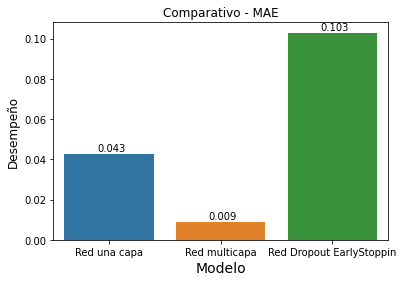

In [23]:
# Celda 4
import seaborn as sns
import matplotlib.pyplot as plt


modelos = ['Red una capa','Red multicapa','Red Dropout EarlyStopping']
#optimizadores = [+str(optimizador_1),str(optimizador_2)+str(optimizador_3)]
metricas = [mae_1,mae_2,mae_3]

df = pd.DataFrame(zip(modelos,metricas), columns=['Modelo', 'Desempeño MAE']) 

plots = sns.barplot(x=modelos, y=metricas, data=df) 
  
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.3f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10,xytext=(2, 6), 
                   textcoords='offset points') 
    
  
plt.xlabel("Modelo", size=14) 
plt.ylabel("Desempeño", size=12)  
plt.title("Comparativo - MAE", size = 12)


plt.show()

Al realizar el entrenamiento de Redes Neuronales, identificamos que:

1.   Calibrar los parámetros como número de épocas, número de neuronas y valores del Dropout no nos agregó mucho valor dado que el parámetro que generó un mejor desempeño fue el del número de épocas, el cual a través del Early Stopping nos permite identificarlo sin tener que hacer la calibración previa del parámetro. 
2.   En un problema con pocos predictores, una arquitectura más sencilla como una Red Multicapa de dos capas frente a una arquitectura más compleja como la que incluía el Early Stopping, Dropout y algunas capas adicionales puede tener un mejor desempeño.
3.   La selección del optimizador es un paso importante dentro del proceso ya que en el estudio del comportamiento de los distintos optimizadores pudimos observar que algunos convergen más rápido que otros, por lo que se hace necesario que se entrene el modelo con muchas épocas para lograr ver una convergencia entre las pérdidas de entrenamiento y validación.
4.   Siempre es necesario usar un conjunto de validación y uno de entrenamiento que permitan ayudar a entrenar el modelo evitando que se genere overfitting. Esto se evidencia en las gráficas comparativas entre loss y val_loss vs las épocas.
5.   Definir la cantidad de capas y los criterios del Dropout, además del número de predictores puede hacer que se obtenga un menor o mejor desempeño, tal como se observa en el último modelo configurado en donde tuvimos el desempeño más bajo de los 3. 

Como conclusión final, quedan muchas inquietudes en relación a cuál sería la mejor forma de definir el número de capas y la cantidad de neuronas. Además, la selección del optimizador es un paso muy importante dentro del proceso de entrenamiento. 